In [4]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Punto 1

#CÓDIGO: 2195566  DONDE x : 34

# longitudes en metros
L1 = 1.7
L2 = 2.55
L3 = 0.85
# cargas kN
F_aplicada_D = 1.2
# distribuida kN / m
w = 0.283

In [6]:
import sympy as sp

In [7]:
# longitudes en metros
# L1 = float(input("Ingrese L1 en metros: "))
# carga distribuida en kN / m
# cargas puntuales en kN
viga = {
    "L1": "metros",
    "L2": "metros",
    "L3": "metros",
    "w": "kN / m",
    "fuerza_D": "kN",
}

for llave, valor in viga.items():
    while True:
        try:
            viga[llave] = float(input(f"Ingrese {llave} en {valor}: "))
            break
        except:
            print(f"Ingrese correctamente el dato {llave} con su unidad en {valor}")

Ingrese L1 en metros: 1.7
Ingrese L2 en metros: 2.55
Ingrese L3 en metros: 0.85
Ingrese w en kN / m: 0.283
Ingrese fuerza_D en kN: 1.2


In [8]:
Ay, Ma, x = sp.symbols(" Ay Ma x ")

In [9]:
# ESTÁTICA DE LA VIGA

# equilibrio en y
equilibrio_y = Ay + viga["fuerza_D"] - viga["w"] * viga["L1"] / 2 - viga["w"] * ( viga["L3"]) / 2 - viga["w"] * viga["L2"]
ecuacion_y = sp.Eq(equilibrio_y, 0)
reaccion_ay =  sp.solve(ecuacion_y)[0]
# kN
reaccion_ay

-0.117525000000000

In [10]:
# sumatoria de momentos
equilibrio_momentos =  Ma + viga["fuerza_D"] * (viga["L1"] + viga["L2"] + viga["L3"]) - viga["w"] * viga["L1"] / 2 * (2 * viga["L1"] / 3) - viga["w"] * viga["L2"] * (viga["L1"] + viga["L2"] / 2) - viga["w"] * viga["L3"] / 2 * (viga["L1"] + viga["L2"] +  viga["L3"] / 3)
ecuacion_momentos = sp.Eq(equilibrio_momentos, 0)
reaccion_Ma =  sp.solve(ecuacion_momentos)[0]
# kN - m
reaccion_Ma

-3.15522125000000

In [11]:
# ECUACIONES DE CORTANTE Y MOMENTO 
# CORTANTE Y MOMENTO PRIMER TRAMO
# 0 <= x <= L1
carga_distribuida = viga["w"] * x / viga["L1"]
# - integral carga * dx + V(x)
Vx_1 = reaccion_ay - sp.integrate(carga_distribuida, x)

Mx_1 = - reaccion_Ma + sp.integrate(Vx_1, x)
Mx_1

-0.0277450980392157*x**3 - 0.117525*x + 3.15522125

In [12]:
# CORTANTE Y MOMENTO SEGUNDO TRAMO
# 0 <= x <= L2
carga_distribuida = viga["w"]
# - integral carga * dx + V(x)
Vx_2 =  Vx_1.subs(x, viga["L1"]) - sp.integrate(carga_distribuida, x)

Mx_2 = Mx_1.subs(x, viga["L1"]) + sp.integrate(Vx_2, x)
Mx_2

-0.1415*x**2 - 0.358075*x + 2.81911708333333

In [13]:
# CORTANTE Y MOMENTO TERCERO TRAMO
# 0 <= x <= L3
carga_distribuida = - viga["w"] * x / viga["L3"] +  viga["w"]
# - integral carga * dx + V(x)
Vx_3 = viga["fuerza_D"] + Vx_2.subs(x, viga["L2"]) - sp.integrate(carga_distribuida, x)

Mx_3 = Mx_2.subs(x, viga["L2"]) + sp.integrate(Vx_3, x)
Mx_3

0.0554901960784314*x**3 - 0.1415*x**2 + 0.120275*x + 0.985922083333333

In [14]:
import numpy as np

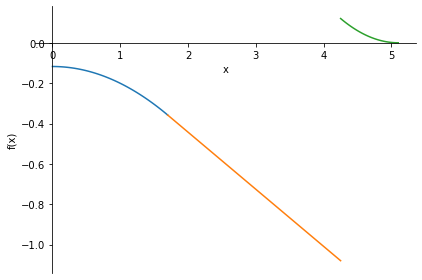

In [15]:
# DFC
x_array = np.arange(0, viga["L1"] + viga["L2"] + viga["L3"] + 0.01, 0.01)
# obtener arrays reemplazando la funcion de cada tramo
tramo1 = sp.lambdify(x, Vx_1)(x_array[x_array <= viga["L1"]])
tramo2 = sp.lambdify(x, Vx_2)(x_array[(x_array > viga["L1"]) & (x_array <= (viga["L1"] + viga["L2"]))] - viga["L1"])
tramo3 = sp.lambdify(x, Vx_3)(x_array[x_array > (viga["L1"] + viga["L2"])] - viga["L1"] - viga["L2"])

cortante_y = np.concatenate((tramo1, tramo2, tramo3))
sp.plot((Vx_1, (x, 0, viga["L1"])), (Vx_2.subs(x, x - viga["L1"]), (x, viga["L1"], viga["L1"] + viga["L2"])), (Vx_3.subs(x, x - (viga["L1"] + viga["L2"])), (x, (viga["L1"] + viga["L2"]), (viga["L1"]  + viga["L2"] + viga["L3"]))))

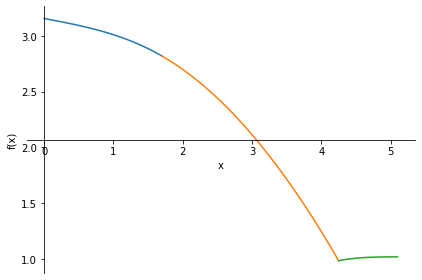

In [16]:
# DFC
x_array = np.arange(0, viga["L1"] + viga["L2"] + viga["L3"] + 0.01, 0.01)
# obtener arrays reemplazando la funcion de cada tramo
tramo1 = sp.lambdify(x, Mx_1)(x_array[x_array <= viga["L1"]])
tramo2 = sp.lambdify(x, Mx_2)(x_array[(x_array > viga["L1"]) & (x_array <= (viga["L1"] + viga["L2"]))] - viga["L1"])
tramo3 = sp.lambdify(x, Mx_3)(x_array[x_array > (viga["L1"] + viga["L2"])] - viga["L1"] - viga["L2"])

momento_y = np.concatenate((tramo1, tramo2, tramo3))
sp.plot((Mx_1, (x, 0, viga["L1"])), (Mx_2.subs(x, x - viga["L1"]), (x, viga["L1"], viga["L1"] + viga["L2"])), (Mx_3.subs(x, x - (viga["L1"] + viga["L2"])), (x, (viga["L1"] + viga["L2"]), (viga["L1"]  + viga["L2"] + viga["L3"]))))

In [17]:
# kN - m
momento_maximo = 0
momento_maximo_positivo = np.amax(momento_y)
momento_maximo_negativo = np.amin(momento_y)

if np.abs(momento_maximo_negativo) > momento_maximo_positivo:
    momento_maximo = np.abs(momento_maximo_negativo)
else: 
    momento_maximo = momento_maximo_positivo

momento_maximo

3.15522125

In [18]:
# kN 
cortante_maximo = 0
cortante_maximo_positivo = np.amax(cortante_y)
cortante_maximo_negativo = np.amin(cortante_y)

if np.abs(cortante_maximo_negativo) > cortante_maximo_positivo:
    cortante_maximo = np.abs(cortante_maximo_negativo)
else: 
   cortante_maximo =cortante_maximo_positivo

cortante_maximo

1.0797249999999998